# Generating data
* choose p_black $\in (0, 1)$ - probability that node at the picture will be black and with prob (1 - p) will be white
* define label by picture - count of white connected components

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
%matplotlib inline

In [2]:
def get_new_picture(shape, p_black):
    b = bernoulli(1 - p_black)
    return b.rvs(size = shape)

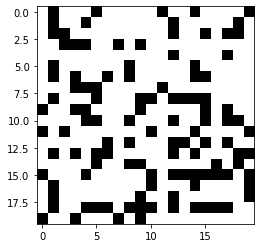

In [11]:
plt.imshow(get_new_picture((20, 20), 0.3), cmap='gray', interpolation='nearest') 

In [5]:
def get_data(shape, p_black, count):
    images = [get_new_picture(shape, p_black) for i in range(count)]
    return np.array(images)

def get_labels(data):
    y = np.zeros(data.shape[0], dtype=int)
    for idx, image in enumerate(data):
        y[idx] = find_connectivities_count(image)
    return y

In [6]:
delta2 = [[0, 1], [1, 0], [-1, 0], [0, -1]]

def dfs(image, color, i, j):
    color[i, j] = 1
    for d in delta2:
        i_new = i + d[0]
        j_new = j + d[1]
        if (i_new >= 0 and j_new >= 0 and i_new < image.shape[0] and j_new < image.shape[0] and
               image[i_new, j_new] == 1 and color[i_new, j_new] == 0):
            dfs(image, color, i_new, j_new)
    color[i, j] = 2

def find_connectivities_count(image):
    count = 0
    color = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[0]):
            if (color[i, j] == 0 and image[i, j] == 1): #image[i, j] == 1 if it is white
                count += 1
                dfs(image, color, i, j)
    return count

2
(10000, 10, 10) (10000,)
0.4962
CPU times: user 7.89 s, sys: 44 ms, total: 7.93 s
Wall time: 7.96 s


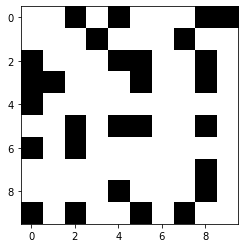

In [28]:
%%time
X = get_data((10, 10), 0.2123, 10000)
y = get_labels(X)
picture = X[10]
plt.imshow(picture, cmap='gray', interpolation='nearest') 
print(find_connectivities_count(picture))
print(X.shape, y.shape)
print(np.mean(y > 1))

In [29]:
frame = pd.DataFrame(data=np.hstack((X.reshape(10000, 100), y.reshape((10000, 1)))))

In [30]:
frame.to_csv('p=0.2123_10x10_10^4_images', index=False)